# MODULE 19.2.2

In [22]:
# Import our dependencies
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

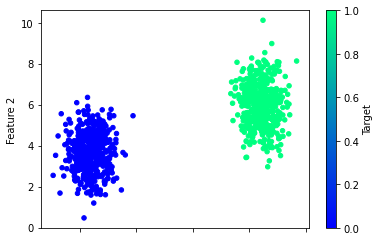

In [23]:
# Generate dummy dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=78)

# Creating a DataFrame with the dummy data
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y

# Plotting the dummy data
df.plot.scatter(x="Feature 1", y="Feature 2", c="Target", colormap="winter")

In [24]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [26]:
# Create the Keras Sequential model
nn_model = tf.keras.models.Sequential()
nn_model

In [27]:
# Add our first Dense layer, including the input layer 
nn_model.add(tf.keras.layers.Dense(units=1, activation="relu", input_dim=2))

In [28]:
# Add the output layer that uses a probability activation function
nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [29]:
# Check the structure of the Sequential model
nn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
 dense_7 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# MODULE 19.2.3

In [31]:
# Fit the model to the training data
fit_model = nn_model.fit(X_train_scaled, y_train, epochs=100)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7341 - accuracy: 0.4693
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7127 - accuracy: 0.4907
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6949 - accuracy: 0.5413
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6798 - accuracy: 0.5880
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6658 - accuracy: 0.6360
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6508 - accuracy: 0.6920
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6338 - accuracy: 0.7280
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.6123 - accuracy: 0.8013
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5875 - accuracy: 0.8547
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.9133
Epoch 11/

24/24 [==============================] - 0s 934us/step - loss: 0.0912 - accuracy: 1.0000
Epoch 83/100
24/24 [==============================] - 0s 949us/step - loss: 0.0898 - accuracy: 1.0000
Epoch 84/100
24/24 [==============================] - 0s 890us/step - loss: 0.0884 - accuracy: 1.0000
Epoch 85/100
24/24 [==============================] - 0s 909us/step - loss: 0.0870 - accuracy: 1.0000
Epoch 86/100
24/24 [==============================] - 0s 971us/step - loss: 0.0857 - accuracy: 1.0000
Epoch 87/100
24/24 [==============================] - 0s 890us/step - loss: 0.0844 - accuracy: 1.0000
Epoch 88/100
24/24 [==============================] - 0s 920us/step - loss: 0.0831 - accuracy: 1.0000
Epoch 89/100
24/24 [==============================] - 0s 997us/step - loss: 0.0818 - accuracy: 1.0000
Epoch 90/100
24/24 [==============================] - 0s 974us/step - loss: 0.0806 - accuracy: 1.0000
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.0794 - accuracy: 1.

<AxesSubplot:>

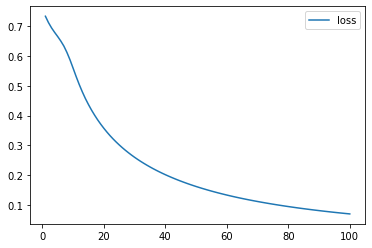

In [32]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

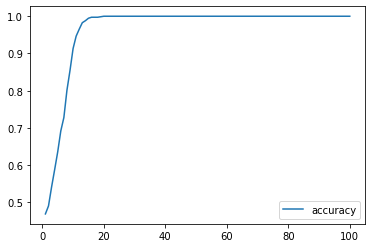

In [33]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [34]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0718 - accuracy: 1.0000 - 170ms/epoch - 21ms/step
Loss: 0.07179833203554153, Accuracy: 1.0


In [35]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]])

# MODULE 19.2.4

<AxesSubplot:xlabel='Feature 1', ylabel='Feature 2'>

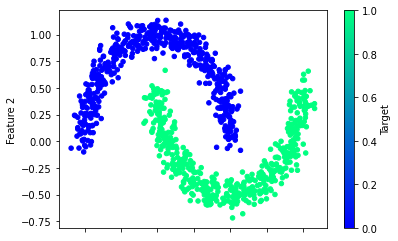

In [37]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [38]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [39]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7419 - accuracy: 0.6387
Epoch 2/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6416 - accuracy: 0.6667
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5738 - accuracy: 0.6880
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5258 - accuracy: 0.7093
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4896 - accuracy: 0.7280
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4613 - accuracy: 0.7493
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4372 - accuracy: 0.7613
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.7773
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3994 - accuracy: 0.7840
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3842 - accuracy: 0.7893
Epoch 11/

24/24 [==============================] - 0s 2ms/step - loss: 0.2564 - accuracy: 0.8920
Epoch 84/100
24/24 [==============================] - 0s 2ms/step - loss: 0.2563 - accuracy: 0.8920
Epoch 85/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8920
Epoch 86/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2562 - accuracy: 0.8920
Epoch 87/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.8920
Epoch 88/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2559 - accuracy: 0.8920
Epoch 89/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8920
Epoch 90/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2557 - accuracy: 0.8920
Epoch 91/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2555 - accuracy: 0.8920
Epoch 92/100
24/24 [==============================] - 0s 1ms/step - loss: 0.2554 - accuracy: 0.8920
Epoch 93/100


<AxesSubplot:>

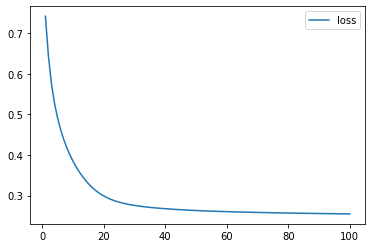

In [40]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

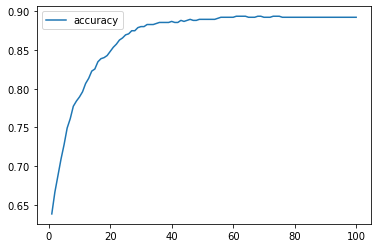

In [41]:
# Plot the accuracy
history_df.plot(y="accuracy")

# MODULE 19.2.5

In [42]:
# Generate our new Sequential model
new_model = tf.keras.models.Sequential()

In [43]:
# Add the input and hidden layer
number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation="relu", input_dim=number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [44]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 0s 1ms/step - loss: 0.6357 - accuracy: 0.7667
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5994 - accuracy: 0.8893
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5672 - accuracy: 0.8893
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5371 - accuracy: 0.8880
Epoch 5/100
24/24 [==============================] - 0s 1ms/step - loss: 0.5094 - accuracy: 0.8907
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4837 - accuracy: 0.8907
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4598 - accuracy: 0.8893
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4376 - accuracy: 0.8880
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4171 - accuracy: 0.8880
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.3984 - accuracy: 0.8880
Epoch 11/

24/24 [==============================] - 0s 737us/step - loss: 0.1999 - accuracy: 0.9173
Epoch 83/100
24/24 [==============================] - 0s 746us/step - loss: 0.1985 - accuracy: 0.9173
Epoch 84/100
24/24 [==============================] - 0s 693us/step - loss: 0.1973 - accuracy: 0.9187
Epoch 85/100
24/24 [==============================] - 0s 746us/step - loss: 0.1960 - accuracy: 0.9187
Epoch 86/100
24/24 [==============================] - 0s 752us/step - loss: 0.1947 - accuracy: 0.9200
Epoch 87/100
24/24 [==============================] - 0s 699us/step - loss: 0.1933 - accuracy: 0.9213
Epoch 88/100
24/24 [==============================] - 0s 743us/step - loss: 0.1920 - accuracy: 0.9227
Epoch 89/100
24/24 [==============================] - 0s 792us/step - loss: 0.1906 - accuracy: 0.9240
Epoch 90/100
24/24 [==============================] - 0s 971us/step - loss: 0.1892 - accuracy: 0.9240
Epoch 91/100
24/24 [==============================] - 0s 866us/step - loss: 0.1878 - accuracy: 

# MODULE 19.3.3

In [45]:
# Import our dependencies
import pandas as pd
import sklearn as skl

# Read in our ramen data
ramen_df = pd.read_csv("ramen-ratings.csv")

# Print out the Country value counts
country_counts = ramen_df.Country.value_counts()
country_counts

Japan            352
USA              323
South Korea      309
Taiwan           224
Thailand         191
China            169
Malaysia         156
Hong Kong        137
Indonesia        126
Singapore        109
Vietnam          108
UK                69
Philippines       47
Canada            41
India             31
Germany           27
Mexico            25
Australia         22
Netherlands       15
Myanmar           14
Nepal             14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Brazil             5
Cambodia           5
Fiji               4
Holland            4
Poland             4
Finland            3
Sarawak            3
Sweden             3
Dubai              3
Ghana              2
Estonia            2
Nigeria            1
United States      1
Name: Country, dtype: int64

<AxesSubplot:ylabel='Density'>

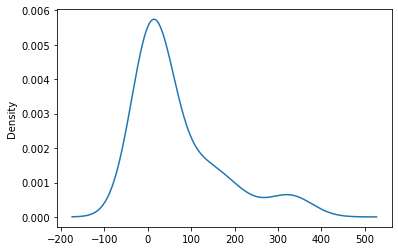

In [46]:
# Visualize the value counts
country_counts.plot.density()

In [47]:
# Determine which values to replace
replace_countries = list(country_counts[country_counts < 100].index)

# Replace in DataFrame
for country in replace_countries:
    ramen_df.Country = ramen_df.Country.replace(country,"Other")


# Check to make sure binning was successful
ramen_df.Country.value_counts()

Other          376
Japan          352
USA            323
South Korea    309
Taiwan         224
Thailand       191
China          169
Malaysia       156
Hong Kong      137
Indonesia      126
Singapore      109
Vietnam        108
Name: Country, dtype: int64

In [48]:
# Create the OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False)

# Fit the encoder and produce encoded DataFrame
encode_df = pd.DataFrame(enc.fit_transform(ramen_df.Country.values.reshape(-1,1)))

# Rename encoded columns
encode_df.columns = enc.get_feature_names(['Country'])
encode_df.head()

C:\Users\jckar\anaconda3\envs\mlenv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
# Merge the two DataFrames together and drop the Country column
ramen_df.merge(encode_df,left_index=True,right_index=True).drop("Country",1)

C:\Users\jckar\anaconda3\envs\mlenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


,Review #,Brand,Variety,Style,Stars,Top Ten,Country_China,Country_Hong Kong,Country_Indonesia,Country_Japan,Country_Malaysia,Country_Other,Country_Singapore,Country_South Korea,Country_Taiwan,Country_Thailand,Country_USA,Country_Vietnam
0,2580,New Touch,T's Restaurant Tantanmen,Cup,3.75,NaN,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,2.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,2.75,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2576,Ching's Secret,Singapore Curry,Pack,3.75,NaN,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2575,5,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,3.5,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2576,4,Wai Wai,Oriental Style Instant Noodles,Pack,1,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2577,3,Wai Wai,Tom Yum Shrimp,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2578,2,Wai Wai,Tom Yum Chili Flavor,Pack,2,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# MODULE 19.3.4

In [50]:
# Import our dependencies
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Read in our dataset
hr_df = pd.read_csv("hr_dataset.csv")
hr_df.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,0.30,1,253,2
1,0.25,1,200,0
2,0.90,4,2880,5
3,0.65,3,1450,3
4,0.50,2,785,2


In [51]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [52]:
# Fit the StandardScaler
scaler.fit(hr_df)

StandardScaler()

In [53]:
# Scale the data
scaled_data = scaler.transform(hr_df)

In [54]:
# Create a DataFrame with the scaled data
transformed_scaled_data = pd.DataFrame(scaled_data, columns=hr_df.columns)
transformed_scaled_data.head()

,Satisfaction_Level,Num_Projects,Time_Spent,Num_Promotions
0,-1.303615,-1.162476,-1.049481,-0.558656
1,-1.512945,-1.162476,-1.094603,-1.804887
2,1.208335,0.860233,1.187080,1.310692
3,0.161689,0.185996,-0.030385,0.064460
4,-0.466299,-0.488240,-0.596549,-0.558656
